In [1]:
import os
import pandas as pd
import numpy as np
import pickle

filename='data/NZ_del20.pkl' #deleted 20% images with lower NZ count
with open(filename, 'rb') as handle:
    subset_dict=pickle.load(handle)
images_list=subset_dict['images']
del subset_dict

#reshape images to same dimensions
from skimage.transform import resize
data_list=[]
for gray_img in images_list:
    img=resize(gray_img, (120,240), anti_aliasing=True, mode='constant') #resize all images to 120x240
    img=np.asarray(img, dtype='float16')
    data_list.append(img)

images_array=np.asarray(data_list)
del data_list, images_list


In [2]:
shape=images_array.shape
pca_data=images_array.reshape(shape[0], shape[1]*shape[2])
del images_array

In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1800)
print("Running PCA.")
pca.fit(pca_data)
print("Finished fitting.")
transformed=pca.transform(pca_data)
var_explained=pca.explained_variance_ratio_
print(np.sum(var_explained))


Running PCA.
Finished fitting.


/home/desgab/.local/easybuild/software/2017/Core/miniconda3/4.3.27/envs/comp551/lib/python3.6/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


0.866511901291643


In [11]:
filename='data/pca1800.pkl'
with open(filename, 'wb') as handle:
    pickle.dump(pca, handle)


In [22]:
filename='data/pca1800.pkl'
with open(filename, 'rb') as handle:
    pca=pickle.load(handle)


In [18]:
transformed=pca.transform(pca_data)
inversed=pca.inverse_transform(transformed)

/home/desgab/.local/easybuild/software/2017/Core/miniconda3/4.3.27/envs/comp551/lib/python3.6/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


In [21]:
filename='data/pca1800_features.pkl'
with open(filename, 'wb') as handle:
    pickle.dump(transformed, handle)


In [13]:
corrs=[]
for i in range(pca_data.shape[0]):
    corrs.append(np.corrcoef(inversed[i,:], pca_data[i,:])[0,1])


In [14]:
np.asarray(corrs).mean()

0.6969067682548293

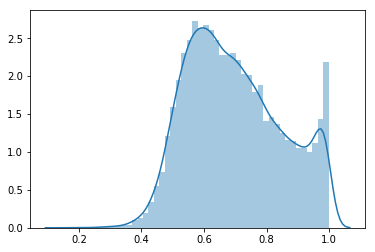

In [16]:
import seaborn as sns
sns.distplot(corrs);


In [23]:
components=pca.components_

In [27]:
img_comp=components.reshape(1800,120,240)
    

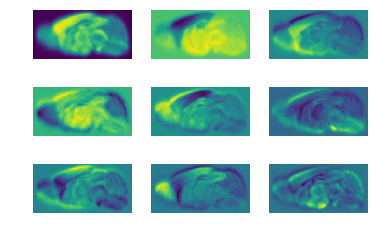

In [29]:
import matplotlib.pyplot as plt
fig,[[ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9]]=plt.subplots(3,3)
axes=[[ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9]]
i=0
for ax_3 in axes:
    for ax in ax_3:
        ax.imshow(img_comp[i,:,:])
        ax.axis('off')
        i+=1
fig.savefig('9_components.pdf')